# Predicting Software Reselling Profits.


Tayko Software is a software catalog firm that sells games and educational software. It started out as a software manufacturer and then added third-party titles to its oﬀerings. It recently revised its collection of items in a new catalog, which it mailed out to its customers. This mailing yielded 2000 purchases. Based on these data, Tayko wants to devise a model for predicting the spending amount that a purchasing customer will yield. The file Tayko.csv contains information on 2000 purchases.

In [29]:
# load the data from dmba package
df1 = dmba.load_data('Tayko.csv')

# display column/variable names
print("Column Names:",list(df1))

# review first 12 records in the data
df1.head(12)

Column Names: ['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq', 'last_update_days_ago', '1st_update_days_ago', 'Web order', 'Gender=male', 'Address_is_res', 'Purchase', 'Spending']


,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0
5,6,1,0,0,0,0,0,0,0,0,...,0,0,1,1995,2002,0,0,1,0,0
6,7,1,0,0,0,0,0,0,0,0,...,0,1,2,1498,1529,0,0,1,0,0
7,8,1,0,0,1,0,0,0,0,0,...,0,0,1,3397,3397,0,1,0,0,0
8,9,1,1,0,0,0,0,0,0,0,...,0,0,4,525,2914,1,1,0,1,489
9,10,1,1,0,0,0,0,0,0,0,...,0,0,1,3215,3215,0,0,0,1,174


In [30]:
df1.dtypes

sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object

In [31]:
# modify column names
new_column_names = ['SequenceNumber', 'US', 'SourceA', 'SourceC', 'SourceB', 'SourceD', 'SourceE', 'SourceM', 'SourceO','SourceH', 'SourceR', 'SourceS', 'SourceT', 'SourceU', 'SourceP', 'SourceX', 'SourceW',
    'Frequency', 'LastUpdate', 'FirstUpdate', 'WebOrder', 'GenderMale', 'AddressResidential', 'Purchase', 'Spending']
df1.columns = new_column_names

# Display the modified DataFrame with updated column names
print(df1)

      SequenceNumber  US  SourceA  SourceC  SourceB  SourceD  SourceE  \
0                  1   1        0        0        1        0        0   
1                  2   1        0        0        0        0        1   
2                  3   1        0        0        0        0        0   
3                  4   1        0        1        0        0        0   
4                  5   1        0        1        0        0        0   
...              ...  ..      ...      ...      ...      ...      ...   
1995            1996   1        0        0        0        0        0   
1996            1997   1        0        0        0        0        0   
1997            1998   1        0        0        0        0        0   
1998            1999   1        0        0        0        0        0   
1999            2000   1        0        0        0        0        0   

      SourceM  SourceO  SourceH  ...  SourceX  SourceW  Frequency  LastUpdate  \
0           0        0        0  ...      

Explore the spending amount by creating a pivot table for the categorical variables and computing the average and standard deviation of spending in each category.

In [32]:
# pivot table: spending by gender
pivot = df1.pivot_table(values='Spending', index='GenderMale', aggfunc=['mean', 'std'])
print(pivot)

                  mean        std
              Spending   Spending
GenderMale                       
0           107.339642  190.83233
1            98.350810  183.02006


In [33]:
# pivot table: spending by web order
pivot = df1.pivot_table(values='Spending', index='WebOrder', aggfunc=['mean', 'std'])
print(pivot)

                mean         std
            Spending    Spending
WebOrder                        
0          82.902439  173.417088
1         129.199531  200.463840


In [34]:
# pivot table: spending by adress
pivot = df1.pivot_table(values='Spending', index='AddressResidential', aggfunc=['mean', 'std'])
print(pivot)

                          mean         std
                      Spending    Spending
AddressResidential                        
0                   105.306162  199.521159
1                    93.174208  132.204281


In [35]:
# pivot table: spending by whether it is US address
pivot = df1.pivot_table(values='Spending', index='US', aggfunc=['mean', 'std'])
print(pivot)

          mean         std
      Spending    Spending
US                        
0   101.216524  174.844401
1   102.924803  189.275664


Explore the relationship between spending and each of the two continuous predictors by creating two scatterplots (Spending vs. Freq, and Spending vs. last_update_days_ago. Does there seem to be a linear relationship?

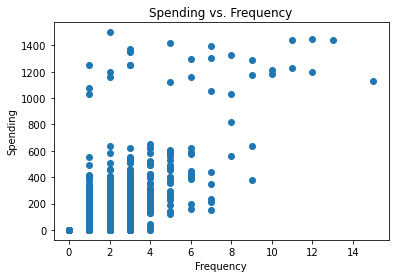

In [36]:
# Scatterplot for Spending vs. Freq
plt.scatter(df1['Frequency'], df1['Spending'])
plt.title('Spending vs. Frequency')
plt.xlabel('Frequency')
plt.ylabel('Spending')
plt.show()

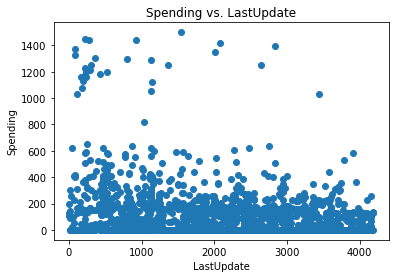

In [37]:
# Scatterplot for Spending vs. last_update_days_ago
plt.scatter(df1['LastUpdate'], df1['Spending'])
plt.title('Spending vs. LastUpdate')
plt.xlabel('LastUpdate')
plt.ylabel('Spending')
plt.show()

###### 'LastUpdate' and 'Frequency' do not have a linear relationship with 'Spending'

To fit a predictive model for spending: Partition the 2000 records into training and validation sets.
Run a multiple linear regression model for Spending vs. all six predictors. Please Type down the estimated predictive equation.

In [38]:
# Selecting predictors and target variable
X = df1[['Frequency','LastUpdate', 'WebOrder', 'GenderMale', 'AddressResidential', 'US']]
y = df1['Spending']

# Splitting the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Model fitting
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [40]:
print("Equation")

print("\nSpending =", round(mlr.intercept_, 3), "+", round(mlr.coef_[0], 3), "* Frequency +", round(mlr.coef_[1], 3), "* LastUpdate +", round(mlr.coef_[2], 3), "* WebOrder +", round(mlr.coef_[3], 3), "* GenderMale +", round(mlr.coef_[4], 3), "* AddressResidential +", round(mlr.coef_[5], 3), "* US")

Equation

Spending = 3.623 + 90.964 * Frequency + -0.008 * LastUpdate + 19.748 * WebOrder + 2.437 * GenderMale + -84.255 * AddressResidential + -3.971 * US


Based on this model, what type of purchaser is most likely to spend a large amount of money?

###### Based on this model purchasers with higher 'Frequency' (highest coefficient- 90.964) are most likey to spend a large amount of money

# Predicting Delayed Flights.

The file FlightDelays.csv contains information on all commercial flights departing the Washington, DC area and arriving at New York during January 2004. For each flight, there is information on the departure and arrival airports, the distance of the route, the scheduled time and date of the flight, and so on. The variable that we are trying to predict is whether or not a flight is delayed. A delay is defined as an arrival that is at least 15 minutes later than scheduled.

Data Preprocessing. Transform variable day of week (DAY_WEEK) info a categorical variable. Bin the scheduled departure time into eight bins. Use these and all other columns as predictors (excluding DAY_OF_MONTH). Partition the data into training (60%) and validation (40%) sets.

In [41]:
# load the data from dmba package
df2 = dmba.load_data('FlightDelays.csv')
df2.head(5)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [42]:
# convert variable DAY_WEEK to categorical data type
print(df2.dtypes)

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
Weather           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM         object
Flight Status    object
dtype: object


In [43]:
df2['DAY_WEEK'] = df2['DAY_WEEK'].astype('category')
print(df2.dtypes)

CRS_DEP_TIME        int64
CARRIER            object
DEP_TIME            int64
DEST               object
DISTANCE            int64
FL_DATE            object
FL_NUM              int64
ORIGIN             object
Weather             int64
DAY_WEEK         category
DAY_OF_MONTH        int64
TAIL_NUM           object
Flight Status      object
dtype: object


In [44]:
# bin CRS_DEP_TIME variable into 8 bins
df2['CRS_DEP_TIME_bins'] = pd.cut(df2['CRS_DEP_TIME'], bins=8,labels=False)
df2.head(5)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,CRS_DEP_TIME_bins
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime,4
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime,5
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime,3
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime,5
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime,2


In [45]:
df2=df2.drop('CRS_DEP_TIME',axis=1)

In [46]:
# remove DAY_OF_MONTH variable
X = df2.drop(['DAY_OF_MONTH', 'Flight Status'], axis=1)  
y=df2[['Flight Status']]

In [47]:
# Partitioning the data into train(60%) and validation (40%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

In [48]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_val:",X_val.shape)
print("y_val:",y_val.shape)

X_train: (1320, 11)
y_train: (1320, 1)
X_val: (881, 11)
y_val: (881, 1)


 Fit a classification tree to the flight delay variable using all the relevant predictors. Do not include DEP_TIME (actual departure time) in the model because it is unknown at the time of prediction (unless we are generating our predictions of delays after the plane takes off, which is unlikely). Use a tree with maximum depth 8 and minimum impurity decrease = 0.01. Express the resulting tree as a set of rules.

In [49]:
# Dropping becasue they are categorical (Cross-check)
# X=X.drop(['DEST','FL_DATE','ORIGIN','TAIL_NUM'],axis=1)

In [50]:
df2=df2.drop(['DEP_TIME'],axis=1)

In [51]:
df2['Flight Status'].unique()

array(['ontime', 'delayed'], dtype=object)

In [52]:
# EDA
# Understanding which categorical attributes are useful predictors in determinig the flight status

# Summary statistics
print(df2.groupby('CARRIER')['Flight Status'].value_counts())

CARRIER  Flight Status
CO       ontime            68
         delayed           26
DH       ontime           414
         delayed          137
DL       ontime           341
         delayed           47
MQ       ontime           215
         delayed           80
OH       ontime            26
         delayed            4
RU       ontime           314
         delayed           94
UA       ontime            26
         delayed            5
US       ontime           369
         delayed           35
Name: Flight Status, dtype: int64


In [53]:
# Calculating the percentage of delayed flights for each carrier
count_carrier = df2['CARRIER'].value_counts()
count_delayed_carrier = df2[df2['Flight Status'] == 'delayed']['CARRIER'].value_counts()

delayed_percentage= (count_delayed_carrier/ count_carrier) * 100
print(delayed_percentage.sort_values(ascending=False))

CO    27.659574
MQ    27.118644
DH    24.863884
RU    23.039216
UA    16.129032
OH    13.333333
DL    12.113402
US     8.663366
Name: CARRIER, dtype: float64


In [54]:
# There is a higher percentage of delayed flights for carriers (CO, MQ, DH, RU) which indicates a correlation between the carrier and flight delays
# We can group these carriers together in one category and remaining in another instead of performing one-hot encoding to simplify the model

high_delay_carriers = ['CO', 'MQ', 'DH', 'RU']

# Creating a new column 'carrier_category'
df2['carrier_category'] = df2['CARRIER'].apply(lambda x: 'High Delay' if x in high_delay_carriers else 'Low Delay')

# Mapping 'High delay' to 1 and 'Low Delay' to 0
df2['carrier_category'] = df2['carrier_category'].map({'High Delay': 1, 'Low Delay': 0})

df2.head(5)

,CARRIER,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,CRS_DEP_TIME_bins,carrier_category
0,OH,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime,4,0
1,DH,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime,5,1
2,DH,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime,3,1
3,DH,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime,5,1
4,DH,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime,2,1


In [55]:
df_new = df2.drop('CARRIER', axis=1)

In [56]:
df_new.dtypes

DEST                   object
DISTANCE                int64
FL_DATE                object
FL_NUM                  int64
ORIGIN                 object
Weather                 int64
DAY_WEEK             category
DAY_OF_MONTH            int64
TAIL_NUM               object
Flight Status          object
CRS_DEP_TIME_bins       int64
carrier_category        int64
dtype: object

In [57]:
# Calculating the percentage of delayed flights based on destination
count_dest = df_new['DEST'].value_counts()
count_delayed_dest = df_new[df2['Flight Status'] == 'delayed']['DEST'].value_counts()

delayed_percentage= (count_delayed_dest/ count_dest) * 100
print(delayed_percentage.sort_values(ascending=False))

EWR    24.210526
JFK    21.761658
LGA    15.913043
Name: DEST, dtype: float64


In [58]:
# We can drop this column
df_new = df_new.drop('DEST', axis=1)

In [59]:
# Calculating the percentage of delayed flights based on Origin
count_origin = df_new['ORIGIN'].value_counts()
count_delayed_origin = df_new[df2['Flight Status'] == 'delayed']['ORIGIN'].value_counts()

delayed_percentage= (count_delayed_origin/ count_origin) * 100
print(delayed_percentage.sort_values(ascending=False))

BWI    25.517241
IAD    24.781341
DCA    16.131387
Name: ORIGIN, dtype: float64


In [60]:
# There is a higher percentage of delayed flights when the ORIGIN is BWI & IAD compared to DCA.
# So we can group them together 

In [61]:
high_delay_origin = ['BWI', 'IAD']

# Creating a new column 'carrier_category'
df_new['Origin_category'] = df_new['ORIGIN'].apply(lambda x: 'High Delay' if x in high_delay_origin else 'Low Delay')

# Mapping 'High delay' to 1 and 'Low Delay' to 0
df_new['Origin_category'] = df_new['Origin_category'].map({'High Delay': 1, 'Low Delay': 0})
df_new = df_new.drop('ORIGIN', axis=1)
df_new.head(5)

,DISTANCE,FL_DATE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,CRS_DEP_TIME_bins,carrier_category,Origin_category
0,184,01/01/2004,5935,0,4,1,N940CA,ontime,4,0,1
1,213,01/01/2004,6155,0,4,1,N405FJ,ontime,5,1,0
2,229,01/01/2004,7208,0,4,1,N695BR,ontime,3,1,1
3,229,01/01/2004,7215,0,4,1,N662BR,ontime,5,1,1
4,229,01/01/2004,7792,0,4,1,N698BR,ontime,2,1,1


In [62]:
df_new['DAY_WEEK'].unique()

[4, 5, 6, 7, 1, 2, 3]
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

In [63]:
# Calculating the percentage of delayed flights based on weekday
count_weekday = df_new['DAY_WEEK'].value_counts()
count_delayed_weekday = df_new[df2['Flight Status'] == 'delayed']['DAY_WEEK'].value_counts()

delayed_percentage= (count_delayed_weekday/ count_weekday) * 100
print(delayed_percentage.sort_values(ascending=False))

# Has some influence in predicting filght delays

1    27.272727
7    26.877470
2    20.521173
5    19.181586
3    17.812500
4    15.322581
6     9.600000
Name: DAY_WEEK, dtype: float64


In [64]:
df_new['DAY_OF_MONTH'].unique() 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [65]:
numeric_columns = df_new.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df_new[numeric_columns].corr()

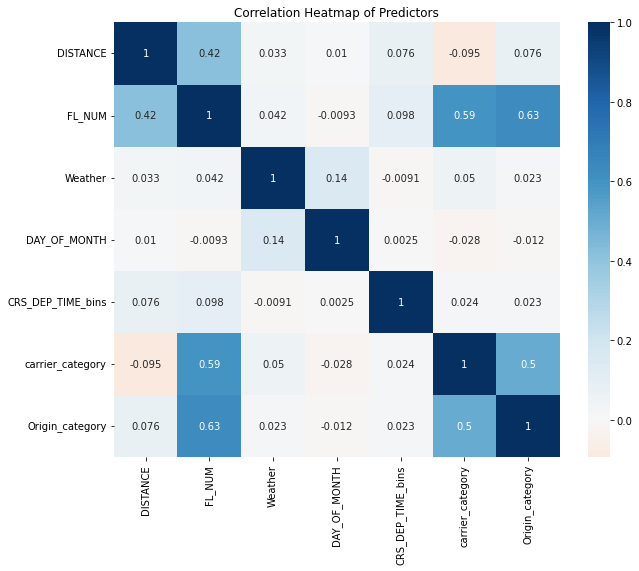

In [66]:
# Generating heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0)
plt.title('Correlation Heatmap of Predictors')
plt.show()

In [67]:
# Tail_num has lot of unique values, so it's best to drop it
# Flight number, day_of_month also doesn't make a good predictor

X=df_new.drop(['FL_DATE','FL_NUM','TAIL_NUM','Flight Status'],axis=1)
y=df_new[['Flight Status']]

In [109]:
# Partitioning the data again into train(60%) and validation (40%) sets for model building
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

In [110]:
# Modeling building and model fitting
classTree = DecisionTreeClassifier(max_depth=8,min_impurity_decrease=0.01, random_state=0)
classTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.01, random_state=0)

Get the confusion matrix and classcification report

In [111]:
y_pred = classTree.predict(X_val)

In [112]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 12 151]
 [  0 718]]


In [113]:
# Classification report
class_report = classification_report(y_val, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

     delayed       1.00      0.07      0.14       163
      ontime       0.83      1.00      0.90       718

    accuracy                           0.83       881
   macro avg       0.91      0.54      0.52       881
weighted avg       0.86      0.83      0.76       881



Plot the tree

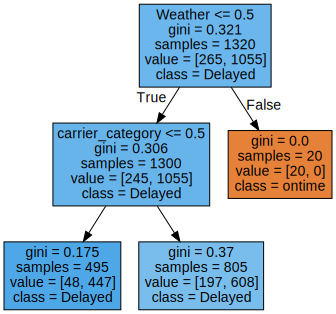

In [114]:
full_tree = export_graphviz(classTree, out_file=None,
                            feature_names=list(X),
                            class_names=['ontime', 'Delayed'],
                            filled=True)

graph = graphviz.Source(full_tree,format='png',)
graph

Are the assigned hyperparameters the best? Use gridsearch to find it out.If they are not, use the best paerameters to build a new model. 

In [115]:
# Start with an initial guess for parameters

param_grid = {
'max_depth': [8, 10, 20, 30, 40],
'min_samples_split': [20, 40, 60, 80, 100],
'min_impurity_decrease': [0, 0.0005, 0.001, 0.01, 0.005],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=2), param_grid, cv=5,
n_jobs=-1) # n_jobs=-1 will utilize all available CPUs
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)
# Adapt grid based on result from initial grid search
param_grid = {
'max_depth': list(range(2, 16)), # 14 values
'min_samples_split': list(range(10, 22)), # 11 values
'min_impurity_decrease': [0.0009, 0.001, 0.0011], # 3 values
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5,
n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Initial score:  0.8143939393939394
Initial parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.01, 'min_samples_split': 20}
Improved score:  0.8204545454545455
Improved parameters:  {'max_depth': 11, 'min_impurity_decrease': 0.0011, 'min_samples_split': 10}


In [116]:
# as we can see that these hyperparemeters weren't the best and we get the best hyperparameters from gridsearch performed above and now we implement the model with these hyperparameters

In [117]:
# Tail_num has lot of unique values, so it's best to drop it
# Flight number, day_of_month also doesn't make a good predictor

X1=df_new.drop(['FL_DATE','FL_NUM','TAIL_NUM','Flight Status'],axis=1)
y1=df_new[['Flight Status']]

In [118]:
# Partitioning the data again into train(60%) and validation (40%) sets for model building
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.4, random_state=42)

In [119]:
# Modeling building and model fitting
classTree1 = DecisionTreeClassifier(max_depth= 11, min_impurity_decrease= 0.0011, min_samples_split= 10, random_state=0)
classTree1.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=11, min_impurity_decrease=0.0011,
                       min_samples_split=10, random_state=0)

In [120]:
y_pred = classTree1.predict(X1_val)

In [121]:
# Confusion matrix
conf_matrix = confusion_matrix(y1_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 39 124]
 [ 25 693]]


In [122]:
class_report = classification_report(y1_val, y_pred)
print("\nClassification Report:")
print(class_report)

#with these hyperparameters we can see improved accuracy


Classification Report:
              precision    recall  f1-score   support

     delayed       0.61      0.24      0.34       163
      ontime       0.85      0.97      0.90       718

    accuracy                           0.83       881
   macro avg       0.73      0.60      0.62       881
weighted avg       0.80      0.83      0.80       881



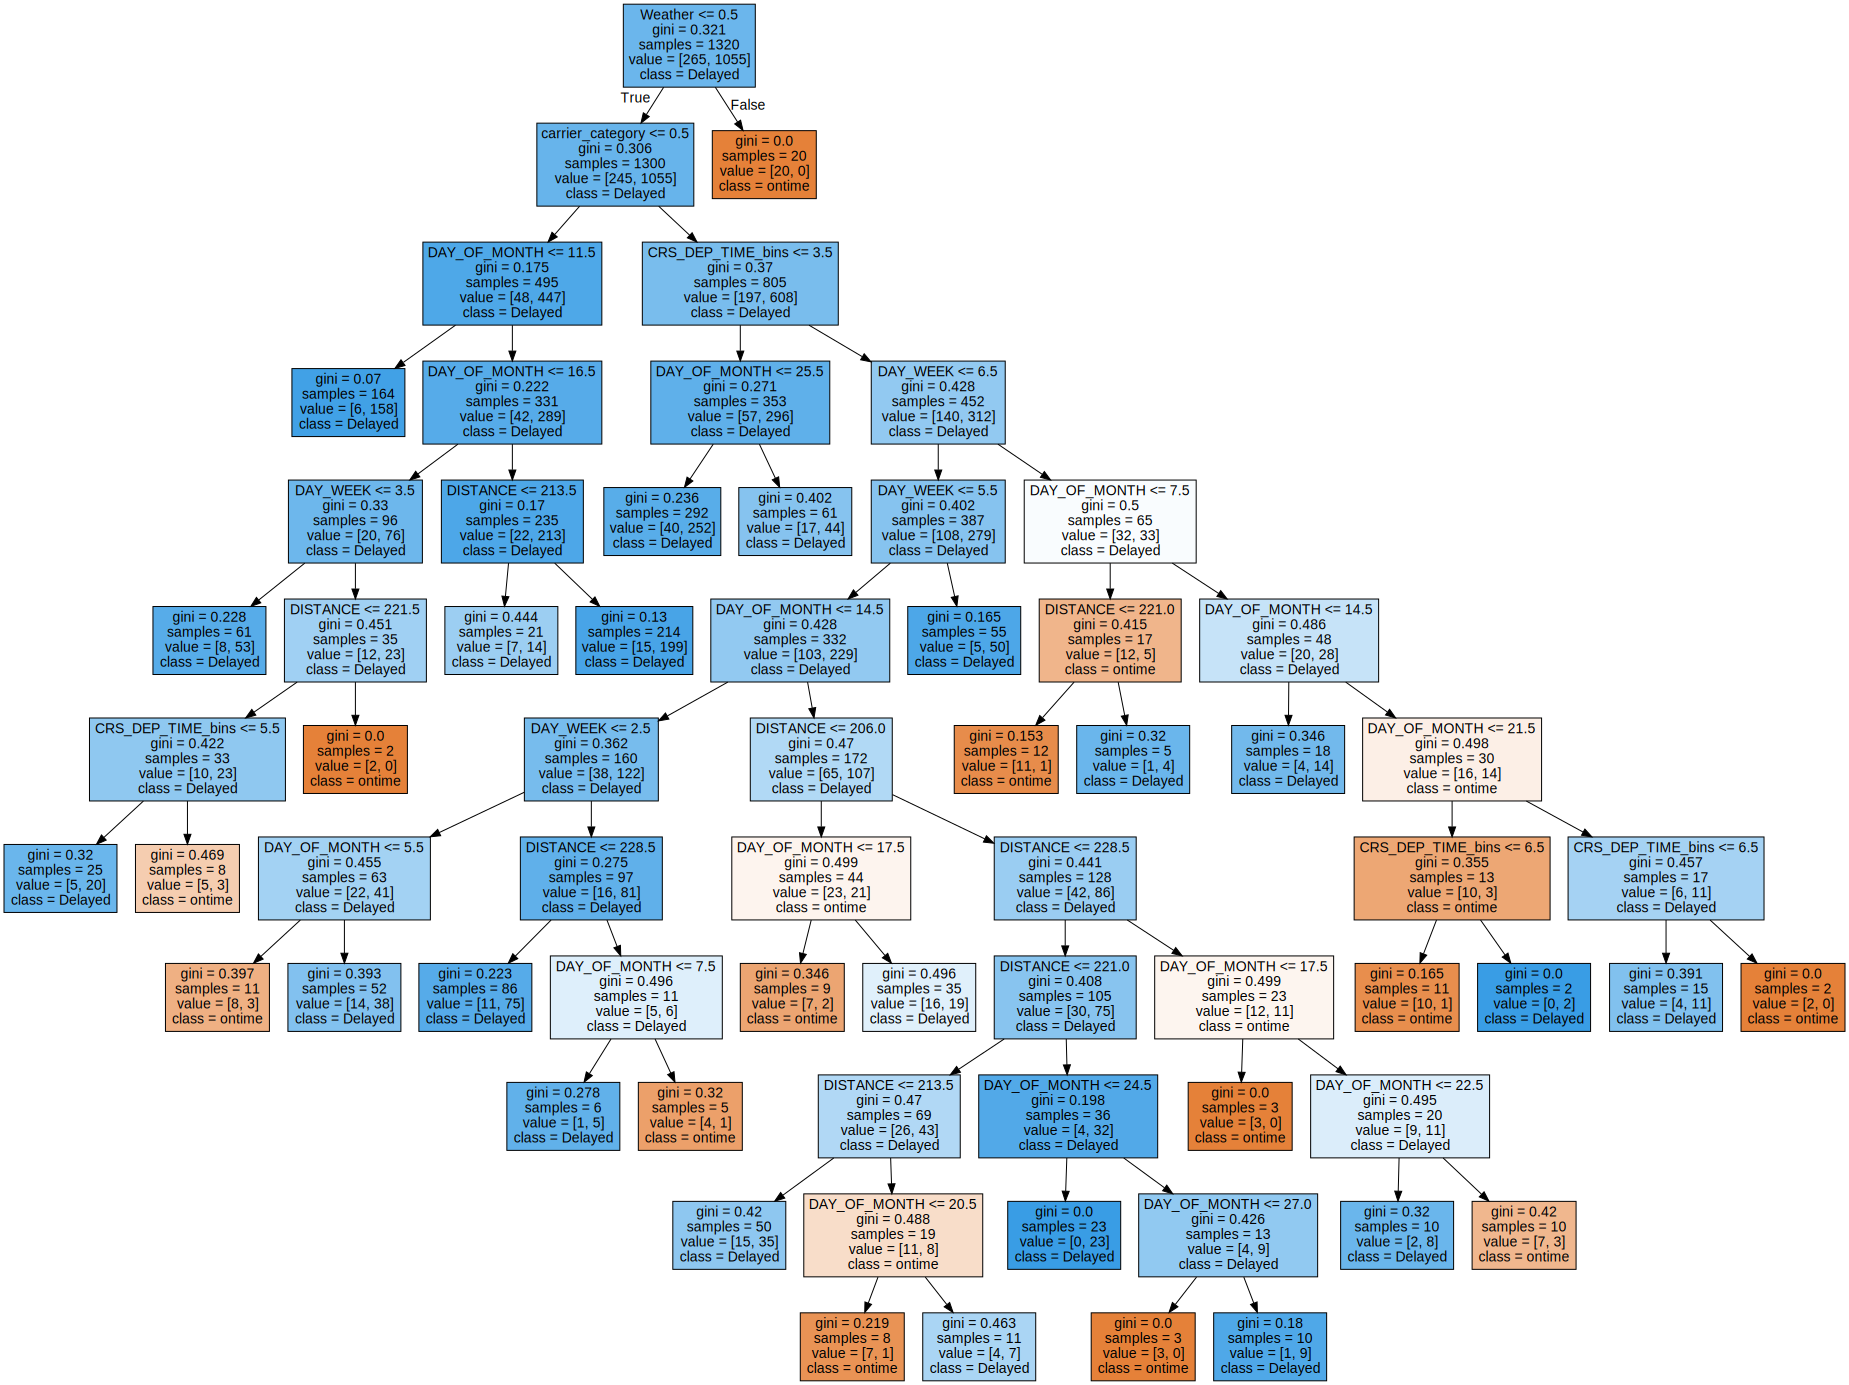

In [123]:
full_tree1 = export_graphviz(classTree1, out_file=None,
                            feature_names=list(X),
                            class_names=['ontime', 'Delayed'],
                            filled=True)

graph = graphviz.Source(full_tree1,format='png',)
graph